<a href="https://colab.research.google.com/github/Santhoshkumar27/python-pro1/blob/main/detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
yolo =cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [77]:
!pip install opencv-python

In [78]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [81]:
classes=[]

with open("./coco.names",'r') as f:
  classes=f.read().splitlines()

In [ ]:
len(classes)

80

In [93]:
image = cv2.imread("./pexels-photo-1000754.jpeg")

blob=cv2.dnn.blobFromImage(new_img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [94]:
blob.shape

(1, 3, 320, 320)

In [95]:
yolo.setInput(blob)

In [96]:
output_layers_names =yolo.getUnconnectedOutLayersNames()
layerOutput =yolo.forward(output_layers_names)

In [97]:
boxes =[]
confidences=[]
class_ids =[]

for output in layerOutput :
  for detection in output:
    
    score = detection[:]
    class_id=np.argmax(score)
    confidence=score[class_id]

    if confidence > 0.7:
      

      center_x =int(detection[0]*width)
      center_y=int(detection[0]*height)

      w=int(detection[0]*width)
      h=int(detection[0]*height)

      x=int(center_x - w/2)
      y=int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [98]:
len(boxes)

829

In [99]:
indexes =cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [100]:
font = cv2.FONT_HERSHEY_COMPLEX
colors = np.random.uniform(0,255,size= (len(boxes),3))

In [101]:
for i in indexes.flatten():
  x,y,w,h =boxes[i]

  label =str(classes[class_ids[i]])
  confi=str(round(confidences[i],2))
  color=colors[i]

  cv2.rectangle(image,(x,y),(x+w,y+h),color,2)
  cv2.putText(image,label+""+confi,(x,y+20),font,2,(255,255,255),2)


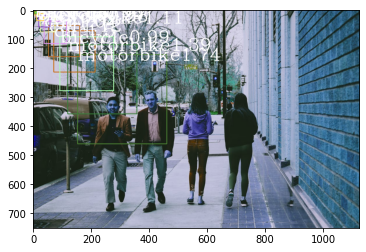

In [102]:
plt.imshow(image)

In [92]:
new_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [69]:
width,height=(320,320)